In [2]:
import pandas as pd
import numpy as np 

In [3]:
data = pd.read_csv('Master_DB.csv')

In [4]:
data.shape

(139433, 39)

In [5]:
data = data.drop(columns=['year_x', 'id', 'track_id', 'features'])

In [6]:
data.columns

Index(['track_name', 'tag', 'artist_name', 'lyrics', 'popularity', 'year_y',
       'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'word_count',
       'num_parts', 'unique_word_count', 'has_chorus', 'has_intro',
       'has_outro', 'has_bridge', 'cleaned_lyrics', 'sentiment',
       'negative_sentiment', 'neutral_sentiment', 'positive_sentiment',
       'average_word_length', 'stopword_count', 'lyric_page_counter'],
      dtype='object')

# Assigning class 

In [8]:
import numpy as np

# Calculate the percentile thresholds
low_threshold = np.percentile(data['popularity'], 25)
high_threshold = np.percentile(data['popularity'], 75)

# Create the 'popularity_class' column based on conditions
data['popularity_class'] = np.select(
    [
        data['popularity'] <= low_threshold,              # Low popularity (0)
        (data['popularity'] > low_threshold) & (data['popularity'] <= high_threshold),  # Neutral (1)
        data['popularity'] > high_threshold               # High popularity (2)
    ],
    [0, 1, 2]  # Assign corresponding class values
)

# Check the distribution of the new column
print(data['popularity_class'].value_counts())

popularity_class
1    68914
0    35808
2    34711
Name: count, dtype: int64


In [9]:
data.columns


Index(['track_name', 'tag', 'artist_name', 'lyrics', 'popularity', 'year_y',
       'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'word_count',
       'num_parts', 'unique_word_count', 'has_chorus', 'has_intro',
       'has_outro', 'has_bridge', 'cleaned_lyrics', 'sentiment',
       'negative_sentiment', 'neutral_sentiment', 'positive_sentiment',
       'average_word_length', 'stopword_count', 'lyric_page_counter',
       'popularity_class'],
      dtype='object')

# Label encoding the artist name 

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'artist_name' column
data['artist_encoded'] = label_encoder.fit_transform(data['artist_name'])

# And Genre 

In [13]:
label_encoder_genre = LabelEncoder()

# Fit and transform the 'genre' column
data['genre_encoded'] = label_encoder_genre.fit_transform(data['genre'])

In [141]:
# Assuming 'data' is your DataFrame
unique_genres = data['genre'].nunique()  # Count of unique genres
unique_artists = data['artist_name'].nunique()  # Count of unique artists

# Output the results
print(f"Number of unique genres: {unique_genres}")
print(f"Number of unique artists: {unique_artists}")

Number of unique genres: 81
Number of unique artists: 17348


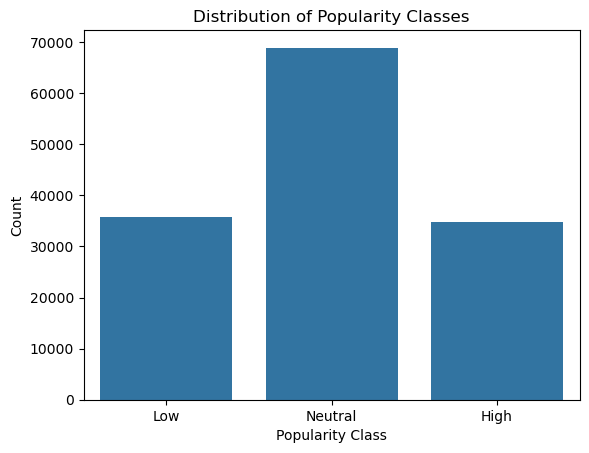

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of popularity classes
sns.countplot(x='popularity_class', data=data)
plt.title('Distribution of Popularity Classes')
plt.xlabel('Popularity Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Low', 'Neutral', 'High'])
plt.show()

In [123]:

def classify_popularity(popularity):
    if popularity > 75:
        return "High"
    elif popularity < 25:
        return "Low"
    else:
        return "Neutral"

class_counts = data['popularity'].apply(classify_popularity).value_counts()

# Total number of samples
total_samples = len(data)

categories = ['Low', 'Neutral', 'High']
for category in categories:
    count = class_counts.get(category, 0)  
    percentage = (count / total_samples) * 100
    print(f"No of samples with {category} popularity: {count} ({percentage:.2f}%)")


No of samples with Low popularity: 47682 (34.20%)
No of samples with Neutral popularity: 91285 (65.47%)
No of samples with High popularity: 466 (0.33%)


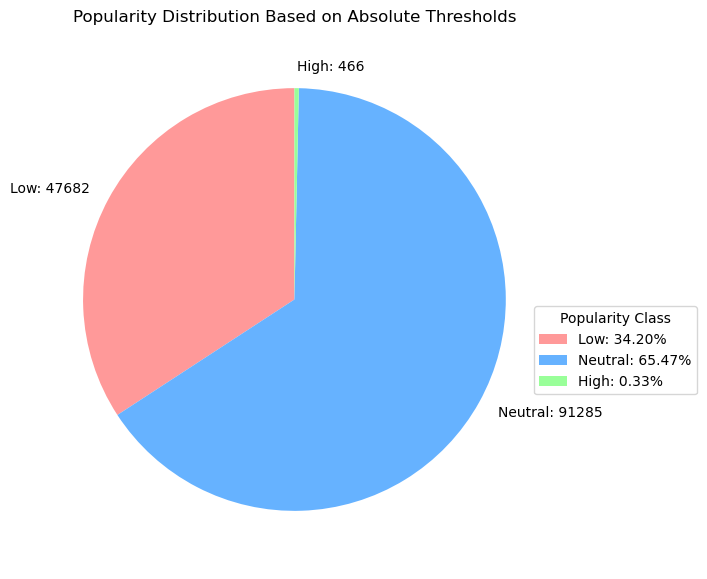

In [131]:
import matplotlib.pyplot as plt

# Simulating the class counts based on example percentages
class_counts = {
    "Low": 47682,
    "Neutral": 91285,
    "High": 466
}

# Prepare the data
labels = list(class_counts.keys())
sizes = list(class_counts.values())
colors = ['#FF9999', '#66B2FF', '#99FF99']  # Custom colors for better visuals

# Calculate percentages
percentages = [f"{(size / sum(sizes)) * 100:.2f}%" for size in sizes]

# Create custom labels for the legend (with percentages)
legend_labels = [f"{label}: {percent}" for label, percent in zip(labels, percentages)]

# Plot the pie chart
plt.figure(figsize=(6, 7))
wedges, texts = plt.pie(
    sizes,
    labels=sizes,  # Display absolute counts inside the pie chart
    startangle=90,
    colors=colors
)

# Add text labels on wedges (absolute counts)
for i, text in enumerate(texts):
    text.set_text(f"{labels[i]}: {sizes[i]}")

# Add the legend with percentages
plt.legend(wedges, legend_labels, title="Popularity Class", loc="best", bbox_to_anchor=(1, 0.5))

plt.title("Popularity Distribution Based on Absolute Thresholds")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

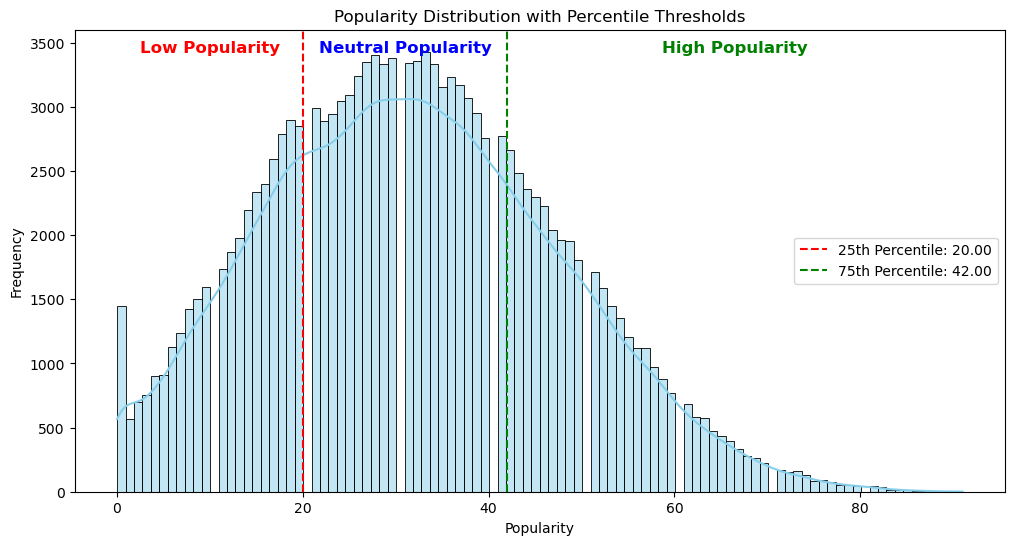

In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate 25th and 75th percentiles
low_threshold = np.percentile(data['popularity'], 25)
high_threshold = np.percentile(data['popularity'], 75)

# Plotting the distribution of popularity
plt.figure(figsize=(12, 6))
sns.histplot(data['popularity'], bins=100, kde=True, color='skyblue')

# Adding vertical lines for thresholds
plt.axvline(low_threshold, color='red', linestyle='--', label=f'25th Percentile: {low_threshold:.2f}')
plt.axvline(high_threshold, color='green', linestyle='--', label=f'75th Percentile: {high_threshold:.2f}')

# Annotate regions for class selection (at the top)
plt.text(low_threshold / 2, max(plt.ylim()) * 0.95, 'Low Popularity', color='red', ha='center', fontsize=12, fontweight='bold')
plt.text((low_threshold + high_threshold) / 2, max(plt.ylim()) * 0.95, 'Neutral Popularity', color='blue', ha='center', fontsize=12, fontweight='bold')
plt.text((high_threshold + max(data['popularity'])) / 2, max(plt.ylim()) * 0.95, 'High Popularity', color='green', ha='center', fontsize=12, fontweight='bold')

# Plot aesthetics
plt.title('Popularity Distribution with Percentile Thresholds')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


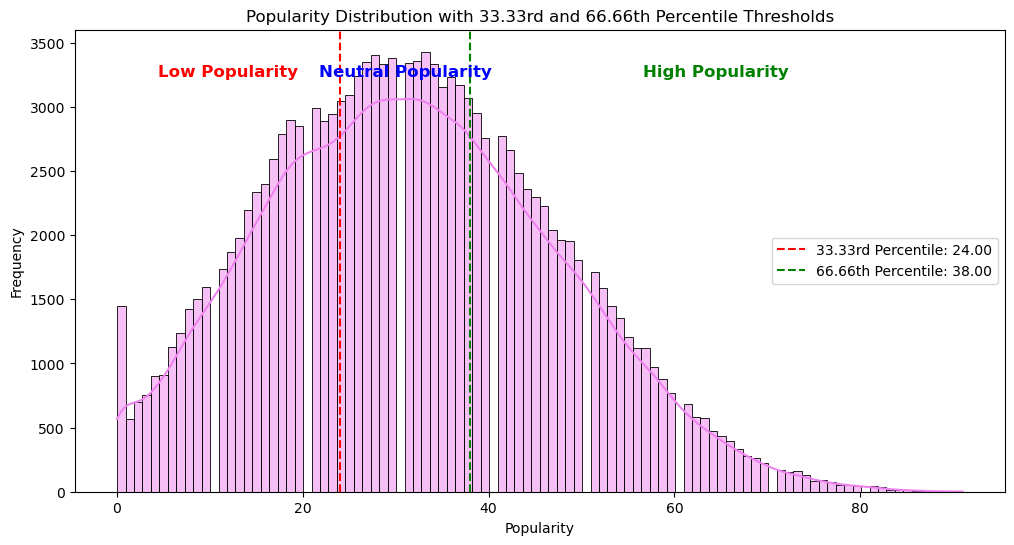

In [103]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate 33.33rd and 66.66th percentiles
low_threshold = np.percentile(data['popularity'], 33.33)
high_threshold = np.percentile(data['popularity'], 66.66)

# Plotting the distribution of popularity
plt.figure(figsize=(12, 6))
sns.histplot(data['popularity'], bins=100, kde=True, color='violet')

# Adding vertical lines for thresholds
plt.axvline(low_threshold, color='red', linestyle='--', label=f'33.33rd Percentile: {low_threshold:.2f}')
plt.axvline(high_threshold, color='green', linestyle='--', label=f'66.66th Percentile: {high_threshold:.2f}')

# Annotate regions for class selection (at the top)
plt.text(low_threshold / 2, max(plt.ylim()) * 0.9, 'Low Popularity', color='red', ha='center', fontsize=12, fontweight='bold')
plt.text((low_threshold + high_threshold) / 2, max(plt.ylim()) * 0.9, 'Neutral Popularity', color='blue', ha='center', fontsize=12, fontweight='bold')
plt.text((high_threshold + max(data['popularity'])) / 2, max(plt.ylim()) * 0.9, 'High Popularity', color='green', ha='center', fontsize=12, fontweight='bold')

# Plot aesthetics
plt.title('Popularity Distribution with 33.33rd and 66.66th Percentile Thresholds')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


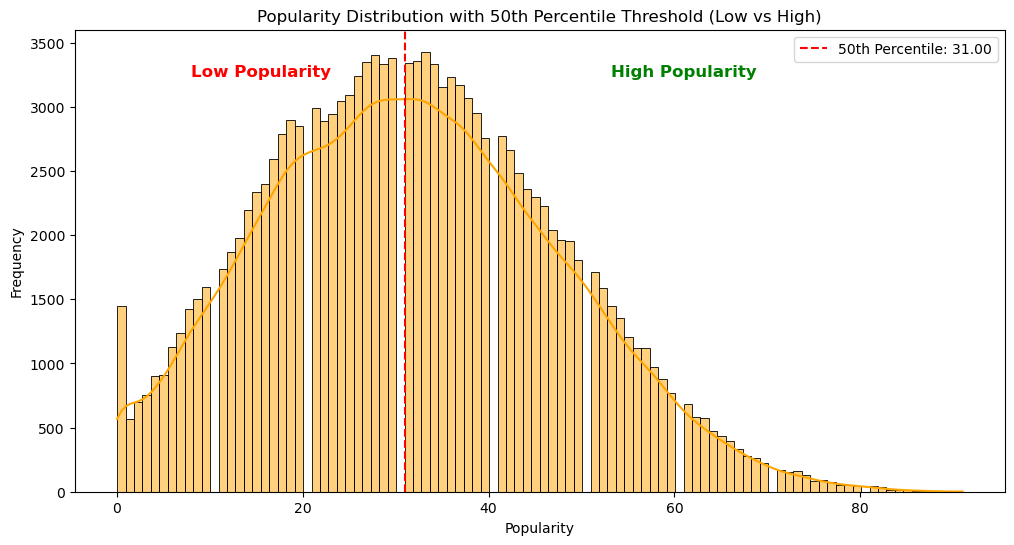

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate 50th percentile (median) of the popularity
median_threshold = np.percentile(data['popularity'], 50)

# Plotting the distribution of popularity
plt.figure(figsize=(12, 6))
sns.histplot(data['popularity'], bins=100, kde=True, color='orange')

# Adding vertical line for median threshold
plt.axvline(median_threshold, color='red', linestyle='--', label=f'50th Percentile: {median_threshold:.2f}')

# Annotate regions for class selection (at the top)
plt.text(median_threshold / 2, max(plt.ylim()) * 0.9, 'Low Popularity', color='red', ha='center', fontsize=12, fontweight='bold')
plt.text((median_threshold + max(data['popularity'])) / 2, max(plt.ylim()) * 0.9, 'High Popularity', color='green', ha='center', fontsize=12, fontweight='bold')

# Plot aesthetics
plt.title('Popularity Distribution with 50th Percentile Threshold (Low vs High)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Random Forest 

In [135]:
selected_features = [
    'lyric_page_counter',  'word_count', 'num_parts', 'year_y',
    'artist_encoded', 'genre_encoded', 
    'positive_sentiment', 'negative_sentiment', 'neutral_sentiment'
]

# Splitting features and target
X = data[selected_features]
y = data['popularity_class']

In [137]:
X.shape

(139433, 9)

In [139]:
y.shape

(139433,)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("")
print(f'Accuracy of Random Forest Classifier on derived features: {accuracy:.4f}')
print("")



Accuracy of Random Forest Classifier on derived features: 0.7161



In [62]:
# Print detailed classification report
print("Classification Report of Random Forest Classifier on derived features:")
print(classification_report(y_test, y_pred))

Classification Report of Random Forest Classifier on derived features:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      7199
           1       0.69      0.78      0.73     13700
           2       0.76      0.64      0.69      6988

    accuracy                           0.72     27887
   macro avg       0.73      0.69      0.71     27887
weighted avg       0.72      0.72      0.71     27887

